In [2]:
# load packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import confusion_matrix
from torchviz import make_dot

## Data loading and cleaning

In [3]:
# load dataset.csv

dataset = pd.read_csv('dataset.csv')
dataset.head()

# remove first row

dataset = dataset.iloc[1:]


# first column is Plant height (cm) for Ss, second column is Plant height (cm) for Sc and third is for Sv
# the fourth, 5th and 6th are for Inflorescence height (mm) (the name of the 1st row of column 4 is Inflorescence height (mm))
# 7th and 8th are for Pedicel Length (mm)
# 9th and 10th are for Capitulum Length (mm) 
# 11th and 12th are for 

# create numpy array for each column

# create zero arary for 16 datapoints across 20 samples

data = np.zeros((60, 16))
# first 20 rows is for Ss, next 20 for Sc, next 20 for Sv

species = ["Ss", "Sc", "Sv"]
# predictors Plant height (cm)	Inflorescence height (mm)	Pedicel Length (mm)	Capitulum Length (mm)	Capitulum Width (mm)	Number of Ray Florets	Length of Ray Florest (mm)	Width of Ray Florets (mm)	Longest leaf length (cm)	Midleaf length (cm)	Number of midleaf lobes	Leaf dissection	Standardized leaf perimeter	Seed length (mm)	Total number of seeds 	Pollen pore size (uM)

predictors = ["Plant height (cm)", "Inflorescence height (mm)", "Pedicel Length (mm)", "Capitulum Length (mm)", "Capitulum Width (mm)", "Number of Ray Florets", "Length of Ray Florest (mm)", "Width of Ray Florets (mm)", "Longest leaf length (cm)", "Midleaf length (cm)", "Number of midleaf lobes", "Leaf dissection", "Standardized leaf perimeter", "Seed length (mm)", "Total number of seeds", "Pollen pore size (uM)"]

# column 1, 2 and 3 are for first 20, second 20 and third 20 of the fist column of the dataset
data[0:20, 0] = dataset.iloc[0:20, 0].values
data[20:40, 0] = dataset.iloc[0:20, 1].values
data[40:60, 0] = dataset.iloc[0:20, 2].values
data[0:20, 1] = dataset.iloc[0:20, 3].values
data[20:40, 1] = dataset.iloc[0:20, 4].values
data[40:60, 1] = dataset.iloc[0:20, 5].values
data[0:20, 2] = dataset.iloc[0:20, 6].values
data[20:40, 2] = dataset.iloc[0:20, 7].values
data[40:60, 2] = dataset.iloc[0:20, 8].values
data[0:20, 3] = dataset.iloc[0:20, 9].values
data[20:40, 3] = dataset.iloc[0:20, 10].values
data[40:60, 3] = dataset.iloc[0:20, 11].values
data[0:20, 4] = dataset.iloc[0:20, 12].values
data[20:40, 4] = dataset.iloc[0:20, 13].values
data[40:60, 4] = dataset.iloc[0:20, 14].values
data[0:20, 5] = dataset.iloc[0:20, 15].values
data[20:40, 5] = dataset.iloc[0:20, 16].values
data[40:60, 5] = dataset.iloc[0:20, 17].values
data[0:20, 6] = dataset.iloc[0:20, 18].values
data[20:40, 6] = dataset.iloc[0:20, 19].values
data[40:60, 6] = dataset.iloc[0:20, 20].values
data[0:20, 7] = dataset.iloc[0:20, 21].values
data[20:40, 7] = dataset.iloc[0:20, 22].values
data[40:60, 7] = dataset.iloc[0:20, 23].values
data[0:20, 8] = dataset.iloc[0:20, 24].values
data[20:40, 8] = dataset.iloc[0:20, 25].values
data[40:60, 8] = dataset.iloc[0:20, 26].values
data[0:20, 9] = dataset.iloc[0:20, 27].values
data[20:40, 9] = dataset.iloc[0:20, 28].values
data[40:60, 9] = dataset.iloc[0:20, 29].values
data[0:20, 10] = dataset.iloc[0:20, 30].values
data[20:40, 10] = dataset.iloc[0:20, 31].values
data[40:60, 10] = dataset.iloc[0:20, 32].values
data[0:20, 11] = dataset.iloc[0:20, 33].values
data[20:40, 11] = dataset.iloc[0:20, 34].values
data[40:60, 11] = dataset.iloc[0:20, 35].values
data[0:20, 12] = dataset.iloc[0:20, 36].values
data[20:40, 12] = dataset.iloc[0:20, 37].values
data[40:60, 12] = dataset.iloc[0:20, 38].values
data[0:20, 13] = dataset.iloc[0:20, 39].values
data[20:40, 13] = dataset.iloc[0:20, 40].values
data[40:60, 13] = dataset.iloc[0:20, 41].values
data[0:20, 14] = dataset.iloc[0:20, 42].values
data[20:40, 14] = dataset.iloc[0:20, 43].values
data[40:60, 14] = dataset.iloc[0:20, 44].values
data[0:20, 15] = dataset.iloc[0:20, 45].values
data[20:40, 15] = dataset.iloc[0:20, 46].values
data[40:60, 15] = dataset.iloc[0:20, 47].values

# print first 5 rows of data and the headers

print(data[0:5, :])

[[23.48 18.99  9.02  7.2   3.39  0.    0.    0.   15.85  8.59  9.41  5.85
   2.34  2.42 55.4   8.15]
 [20.94 18.82  9.17  7.23  3.21  0.    0.    0.   11.12  7.59 11.42  7.21
   2.32  2.46 59.34  8.97]
 [22.28 18.65  8.6   7.25  3.09  0.    0.    0.    6.45 10.34 11.2   5.3
   2.2   2.37 59.91  8.41]
 [26.24 18.77  8.56  7.23  3.09  0.    0.    0.   11.85 10.5  12.35  5.34
   2.26  2.41 43.25  8.28]
 [12.05 19.29  8.83  7.33  3.19  0.    0.    0.    8.17  9.21 12.03  7.17
   2.37  2.47 72.27  8.27]]


## Data plotting
### General box plots of data

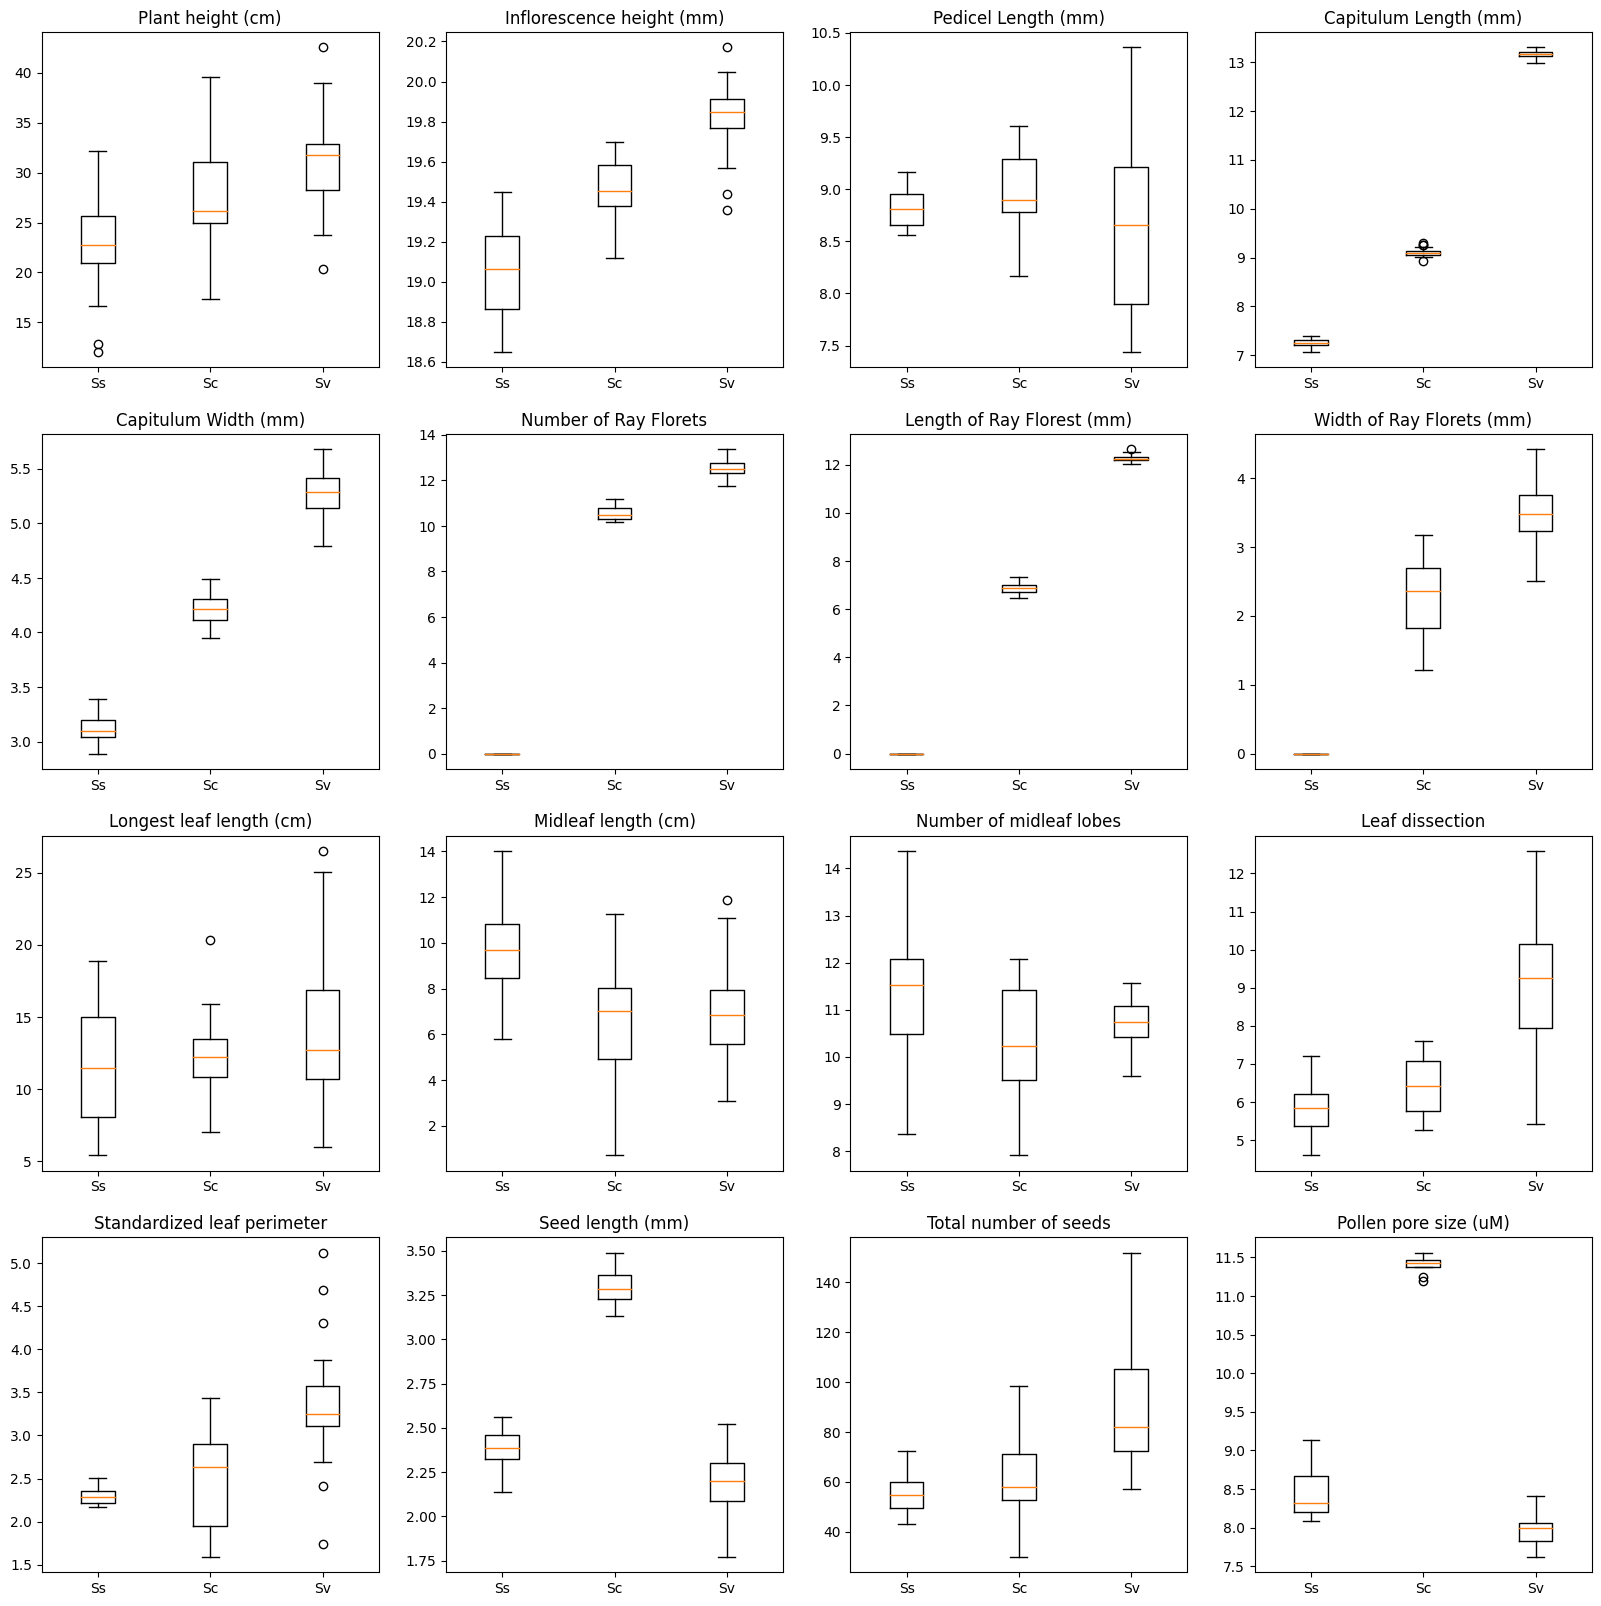

In [28]:
# for each of the 16 predictors, generate a box plot for each of the 3 species through subplots with consistent colour coding for each species

# create a figure with 4 rows and 4 columns of subplots

fig, axs = plt.subplots(4, 4, figsize=(20, 20))

for i in range(0, 4):
    for j in range(0, 4):
        axs[i, j].boxplot([data[0:20, i*4+j], data[20:40, i*4+j], data[40:60, i*4+j]], labels=species)
        axs[i, j].set_title(predictors[i*4+j])

### Distribution plot

In [ ]:
## using seaborne to plot distribution plots



### Correlation matrix plot

Text(0.5, 1.0, 'Correlation Matrix for Whole Dataset')

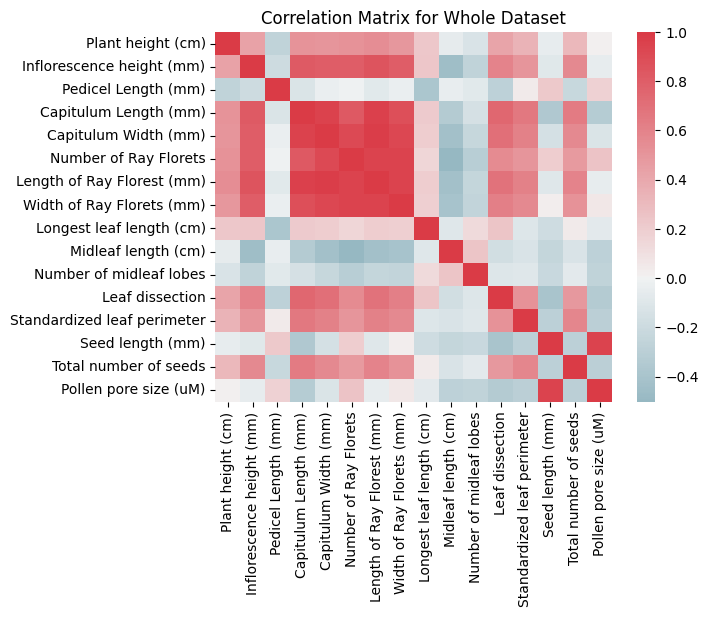

In [20]:
# create numpy array for the response variable

# create zero arary for 60 datapoints across 1 sample

response = np.zeros((60, 1))

# first 20 rows is for Ss, next 20 for Sc, next 20 for Sv

response[0:20, 0] = 0

response[20:40, 0] = 1

response[40:60, 0] = 2


# create a dataframe from the data

df = pd.DataFrame(data, columns=predictors)


# create a dataframe from the response

df_response = pd.DataFrame(response, columns=["Species"])

# create a dataframe with both data and response

df_full = pd.concat([df, df_response], axis=1)

# create a correlation matrix, without the species column

corr = df.corr()

# generate seaborn colour map from that is symetric about 0, with crest being positive and rocket being negative

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# create a heatmap for the correlation matrix

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, center=0, cmap=cmap, annot=False).set_title("Correlation Matrix for Whole Dataset")


Text(0.5, 1.0, 'Correlation Matrix for Ss')

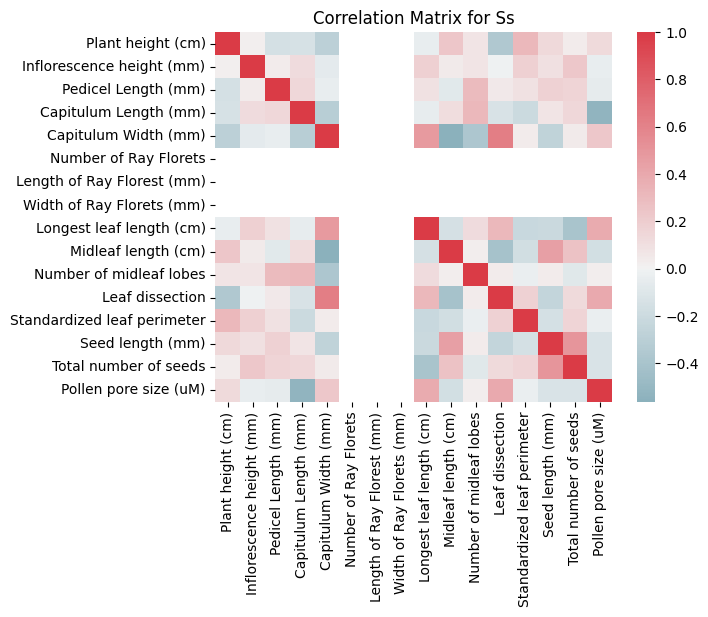

In [21]:

# for each species, create a correlation matrix, without the species column

corr_Ss = df_full[df_full["Species"] == 0].drop("Species", axis=1).corr()

corr_Sc = df_full[df_full["Species"] == 1].drop("Species", axis=1).corr()

corr_Sv = df_full[df_full["Species"] == 2].drop("Species", axis=1).corr()

# create a heatmap for the correlation matrix for each species

sns.heatmap(corr_Ss, xticklabels=corr_Ss.columns, yticklabels=corr_Ss.columns, center=0, cmap=cmap, annot=False).set_title("Correlation Matrix for Ss")

Text(0.5, 1.0, 'Correlation Matrix for Sc')

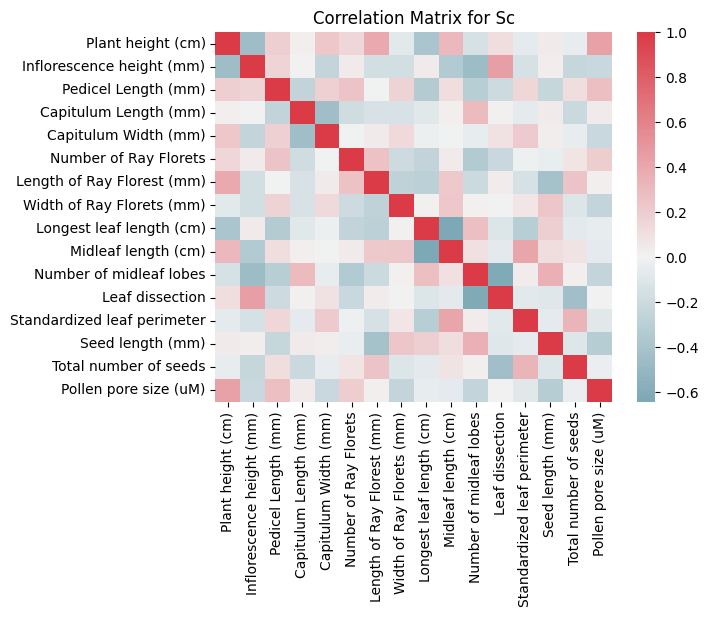

In [22]:

sns.heatmap(corr_Sc, xticklabels=corr_Sc.columns, yticklabels=corr_Sc.columns, center=0, cmap=cmap, annot=False).set_title("Correlation Matrix for Sc")


Text(0.5, 1.0, 'Correlation Matrix for Sv')

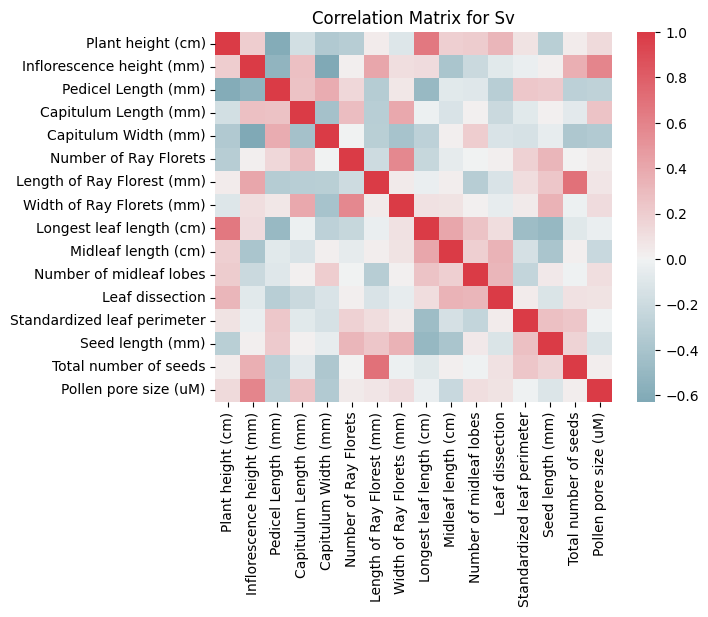

In [23]:

sns.heatmap(corr_Sv, xticklabels=corr_Sv.columns, yticklabels=corr_Sv.columns, center=0, cmap=cmap, annot=False).set_title("Correlation Matrix for Sv")


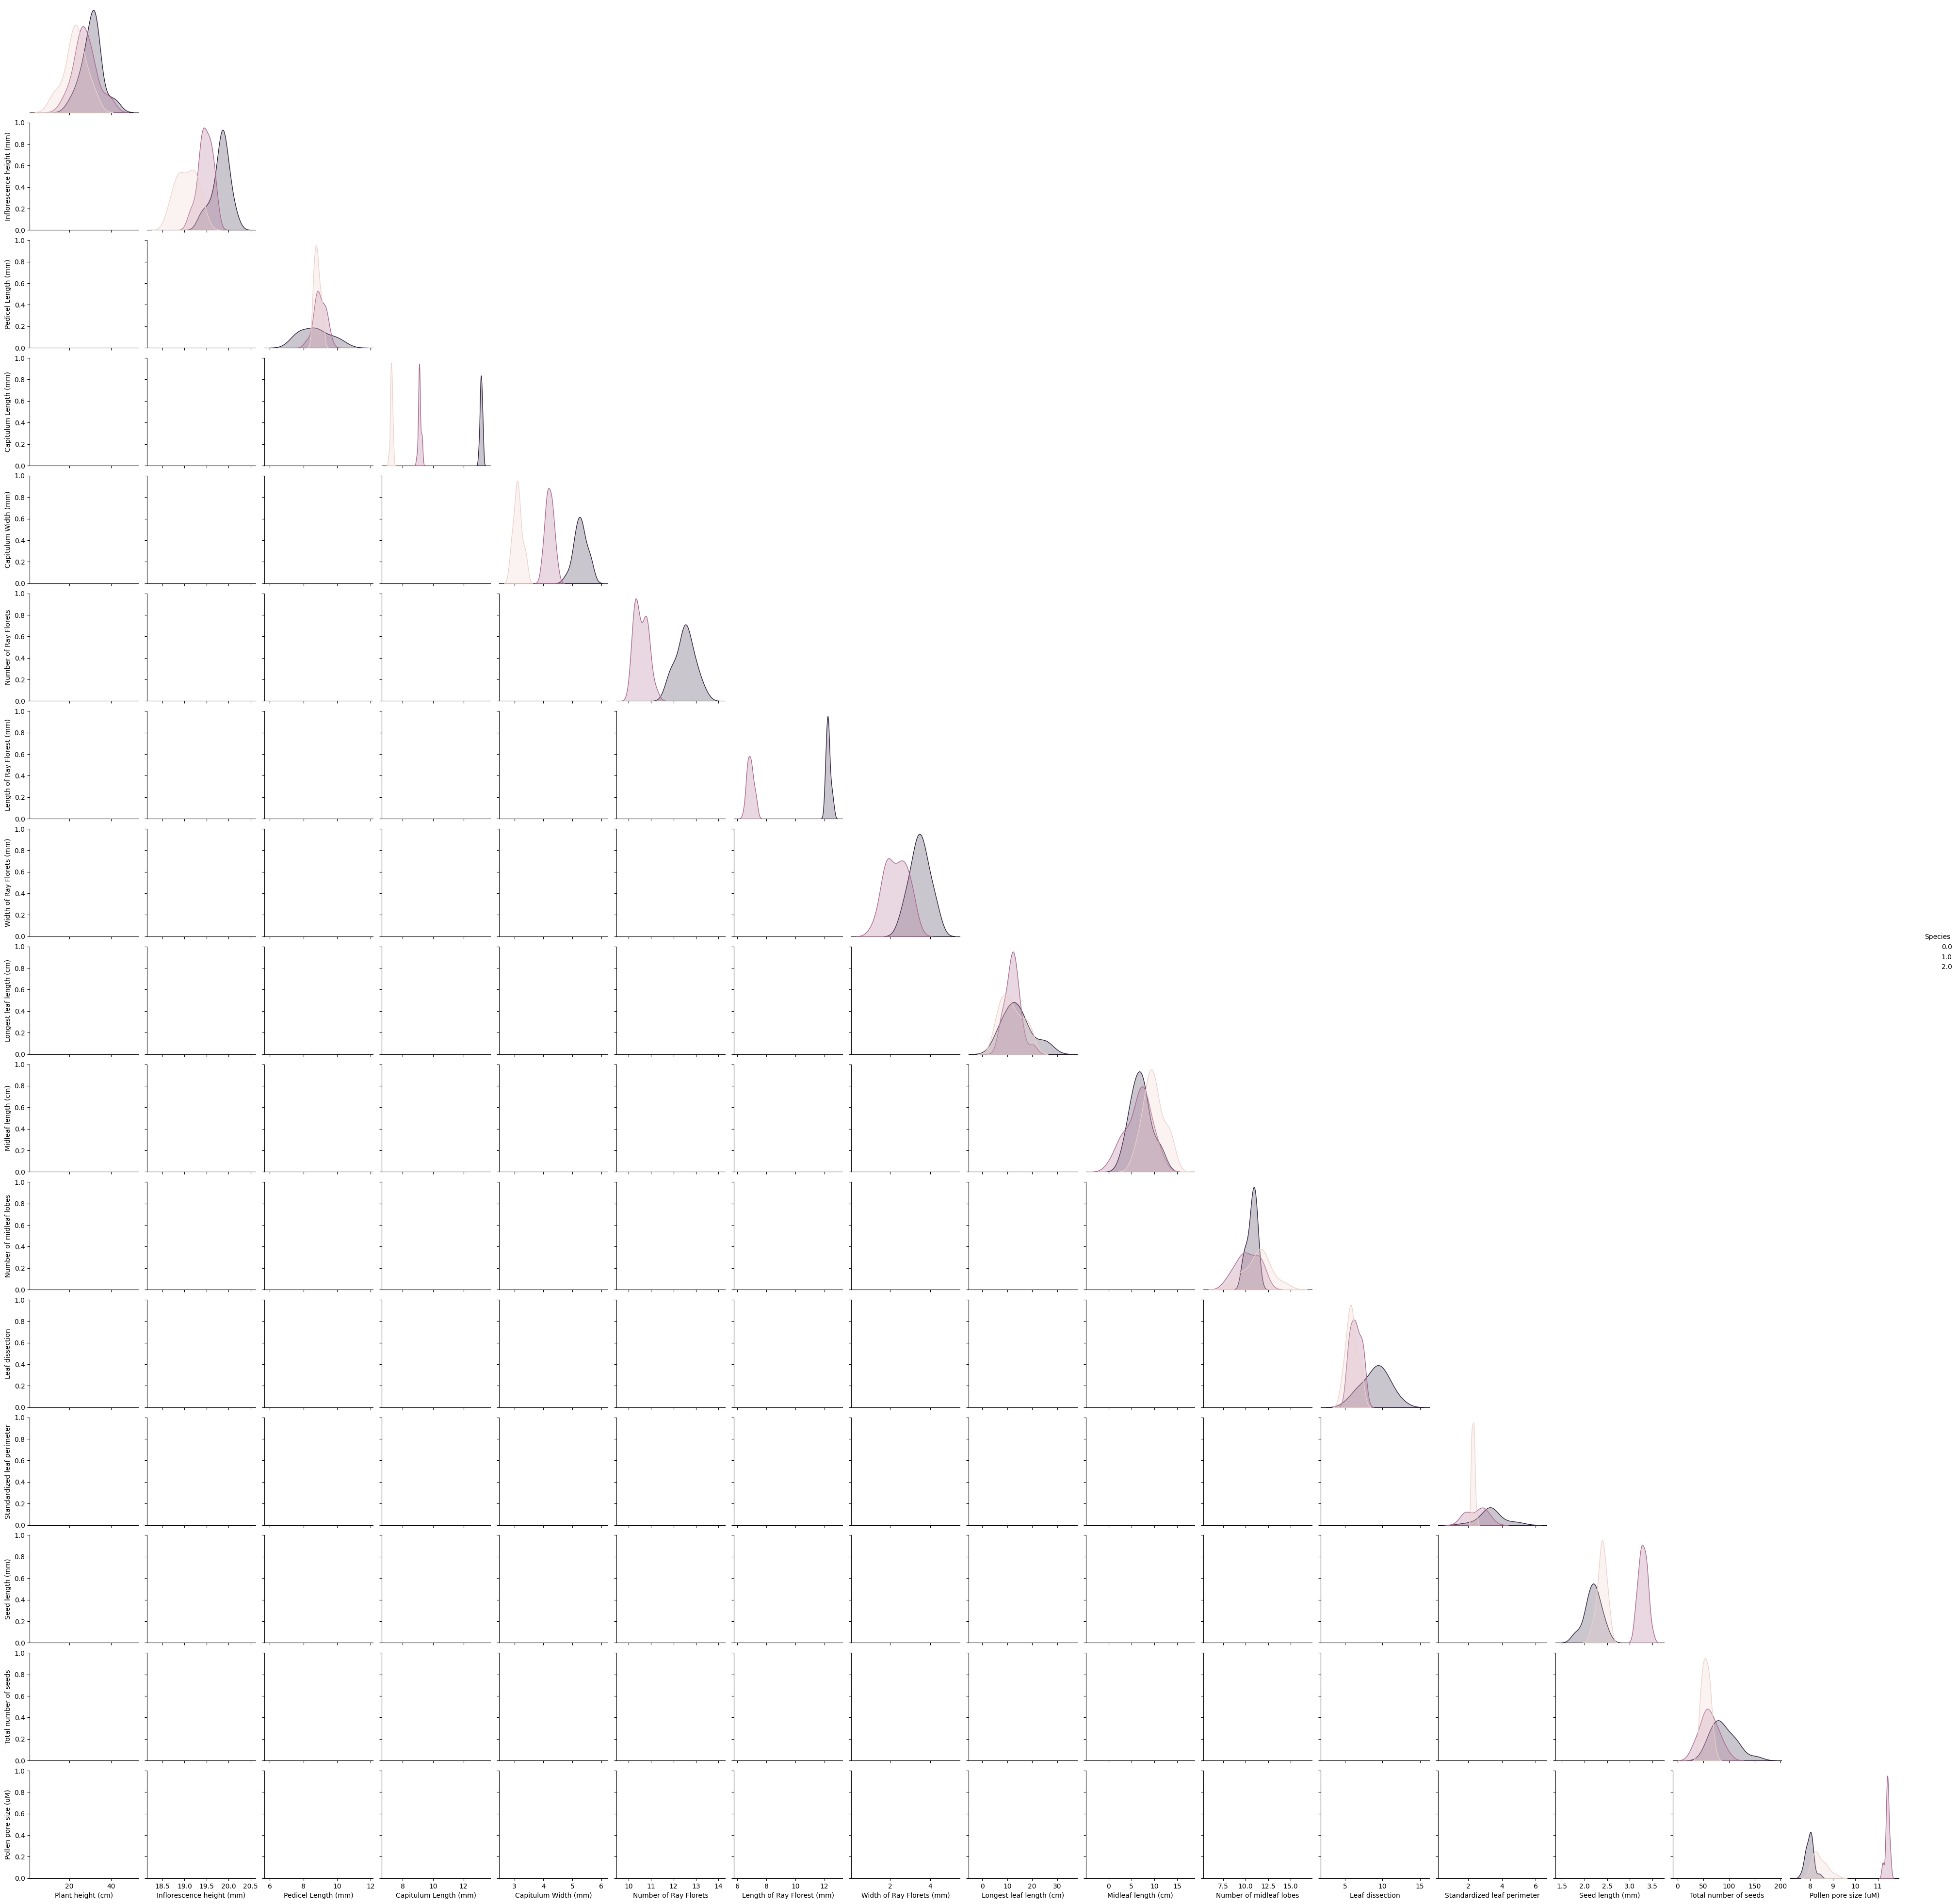

In [35]:
# create a pairplot for the whole dataset and save as png

sns.pairplot(df_full, hue="Species", corner=True).savefig("pairplot.png")


## Generating sequential linear model for the neural network

Using pytorch to generate a sequential linear model for the dataset that takes each of the 16 features as input and outputs the probability of the species.

This is done via mapping:
inputlayer -> relu -> outputlayer
16 -> 16 -> 3

In [4]:
# generate sequential model with 16 nodes in the first hidden layer, 8 nodes in the second hidden layer, and 3 nodes in the output layer using pytorch

model = nn.Sequential()

model.add_module("hidden1", nn.Linear(16, 16))

model.add_module("relu1", nn.ReLU())

model.add_module("output", nn.Linear(16, 3))

# define the loss function

loss_fn = nn.CrossEntropyLoss()

# define the optimizer

optimizer = optim.Adam(model.parameters(), lr=0.01)

In [5]:
# convert the data to tensors

X = torch.tensor(data, dtype=torch.float32)

y = torch.tensor(response, dtype=torch.long)

# create a dataset from the tensors, using pytorch

dataset = TensorDataset(X, y)

# create a dataloader from the dataset

dataloader = DataLoader(dataset, batch_size=60, shuffle=True)

In [6]:
# train the model
epochs = 50000
loss_list = np.zeros(epochs)
accuracy_list = np.zeros(epochs)

for epoch in range(epochs):
    y_pred = model(X)
    loss = loss_fn(y_pred, y.squeeze())
    loss_list[epoch] = loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    accuracy = (y_pred.argmax(1) == y.squeeze()).float().mean()
    accuracy_list[epoch] = accuracy.item()
    if epoch % (1000) == 0:
        print(f"Epoch {epoch}, Loss {loss.item()}, Accuracy {accuracy.item()}, Progress {epoch/epochs*100}%")

# save model

torch.save(model, "model.pt")

Epoch 0, Loss 6.300632953643799, Accuracy 0.3333333432674408, Progress 0.0%
Epoch 1000, Loss 0.0002875962236430496, Accuracy 1.0, Progress 2.0%
Epoch 2000, Loss 7.318097777897492e-05, Accuracy 1.0, Progress 4.0%
Epoch 3000, Loss 2.9549044484156184e-05, Accuracy 1.0, Progress 6.0%
Epoch 4000, Loss 1.353998504782794e-05, Accuracy 1.0, Progress 8.0%
Epoch 5000, Loss 6.96176857672981e-06, Accuracy 1.0, Progress 10.0%
Epoch 6000, Loss 3.788852382058394e-06, Accuracy 1.0, Progress 12.0%
Epoch 7000, Loss 2.111986077579786e-06, Accuracy 1.0, Progress 14.000000000000002%
Epoch 8000, Loss 1.2000384685961762e-06, Accuracy 1.0, Progress 16.0%
Epoch 9000, Loss 6.834661121501995e-07, Accuracy 1.0, Progress 18.0%
Epoch 10000, Loss 3.9339047930297966e-07, Accuracy 1.0, Progress 20.0%
Epoch 11000, Loss 2.205371316676974e-07, Accuracy 1.0, Progress 22.0%
Epoch 12000, Loss 1.311302071371756e-07, Accuracy 1.0, Progress 24.0%
Epoch 13000, Loss 7.152556946721234e-08, Accuracy 1.0, Progress 26.0%
Epoch 14000

In [7]:
# load model

model = torch.load("model.pt")

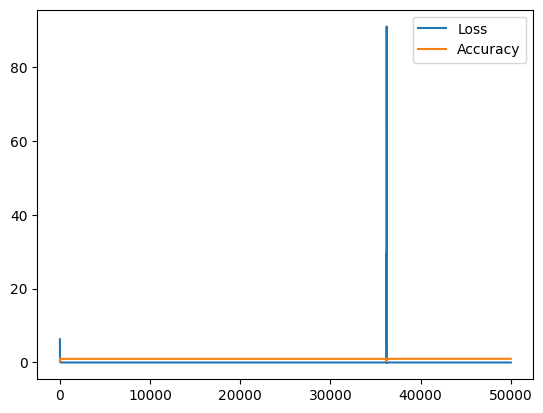

In [8]:
# plot the loss and accuracy over the epochs on same plot

plt.plot(loss_list, label="Loss")
plt.plot(accuracy_list, label="Accuracy")
plt.legend()
plt.show()

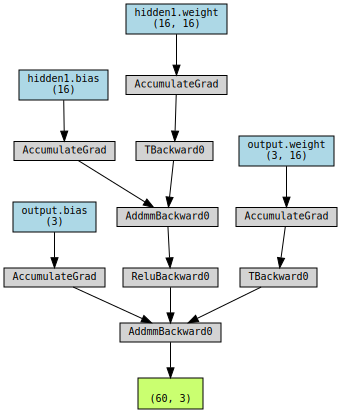

In [9]:
# generate node graph for the model with pytorch that shows the input and output nodes and the hidden layers with the

make_dot(model(X), params=dict(model.named_parameters()))

In [ ]:
## Code to generate predictions from the model

In [33]:
# this code is designed to be run from a .py file, not a jupyter notebook, by uncommenting the following lines:

# import torch
# import numpy as np
# from torch.autograd import Variable
# import torch.nn as nn

# load the model
model = torch.load("model.pt")

# create numpy array for the response variable

species = ["Ss", "Sc", "Sv"]

# create a dict for the input values: ["Plant height (cm)", "Inflorescence height (mm)", "Pedicel Length (mm)", "Capitulum Length (mm)", "Capitulum Width (mm)", "Number of Ray Florets", "Length of Ray Florest (mm)", "Width of Ray Florets (mm)", "Longest leaf length (cm)", "Midleaf length (cm)", "Number of midleaf lobes", "Leaf dissection", "Standardized leaf perimeter", "Seed length (mm)", "Total number of seeds", "Pollen pore size (uM)"]

input_data = {
    "Plant height (cm)": 0,
    "Inflorescence height (mm)": 0,
    "Pedicel Length (mm)": 0,
    "Capitulum Length (mm)": 0,
    "Capitulum Width (mm)": 0,
    "Number of Ray Florets": 0,
    "Length of Ray Florest (mm)": 0,
    "Width of Ray Florets (mm)": 0,
    "Longest leaf length (cm)": 0,
    "Midleaf length (cm)": 0,
    "Number of midleaf lobes": 0,
    "Leaf dissection": 0,
    "Standardized leaf perimeter": 0,
    "Seed length (mm)": 0,
    "Total number of seeds": 0,
    "Pollen pore size (uM)": 0
}

# if you have a np array of input data, you can directly put it here, set it to be a matrix with 1 row and 16 columns

# 
input_dataset = pd.DataFrame(input_data, index=[0])

# convert the input data to a tensor

X = torch.tensor(input_dataset, dtype=torch.float32)

# generate predictions from the model

y_pred = model(input_dataset)

# print the predictions

print(f"Predicted Species: {species[y_pred.argmax(1).item()]}")

# print the probabilities for each species

print(f"Probability of Ss: {y_pred[0][0].item()}")
print(f"Probability of Sc: {y_pred[0][1].item()}")
print(f"Probability of Sv: {y_pred[0][2].item()}")

# print the model

print(model)

TypeError: linear(): argument 'input' (position 1) must be Tensor, not DataFrame